In [1]:
from utils import *
from carga_datos import *

Estandarización de columna NombreCliente 

In [7]:
clientes = clientes.apply(lambda x: x.astype(str).str.lower())
clientes['NombreCliente'] = clientes['NombreCliente'].apply(remove_accents)
clientes['NombreCliente'] = clientes['NombreCliente'].apply(normalize)
clientes.NombreCliente[clientes["Cliente_ID"]=="1646352"]   = "la chiquita"
clientes = clientes.drop_duplicates()
clientes["Cliente_ID"] = clientes["Cliente_ID"].astype(str).astype(int)

In [8]:
print(clientes.shape)
print(len(clientes.Cliente_ID.unique()))

(930500, 2)
930500


Estandarización de NombreProducto

In [9]:
producto = producto.apply(lambda x: x.astype(str).str.lower())
producto['NombreProducto'] = producto['NombreProducto'].apply(remove_accents)
producto['NombreProducto'] = producto['NombreProducto'].apply(normalize)
producto["Producto_ID"] = producto["Producto_ID"].astype(str).astype(int)

Estandarización Town_state

In [10]:
town_state = town_state.apply(lambda x: x.astype(str).str.lower())
town_state['Town'] = town_state['Town'].apply(remove_accents)
town_state['State'] = town_state['State'].apply(remove_accents)
town_state["Agencia_ID"] = town_state["Agencia_ID"].astype(str).astype(int)

Unir las bases de train y test a las bases de cliente, producto y locación 

In [12]:
train = pd.merge(train_small, clientes, how='left', on = "Cliente_ID")
train = pd.merge(train, producto, how='left', on = "Producto_ID")
train = pd.merge(train, town_state, how='left', on = "Agencia_ID")

test = pd.merge(test_small, clientes, how='left', on = "Cliente_ID")
test = pd.merge(test, producto, how='left', on = "Producto_ID")
test = pd.merge(test, town_state, how='left', on = "Agencia_ID")

Búsqueda de los productos más solicitados

In [13]:
train.groupby('NombreProducto').NombreProducto.count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,NombreProducto,count
363,nito 1p 62g bim 1278,270170
222,donas azucar 4p 105g bim 1250,265447
320,mantecadas vainilla 4p 125g bim 1240,244262
382,pan blanco 640g bim 2233,244108
499,rebanada 2p 55g bim 1284,227705


Búsqueda de los principales clientes 

In [14]:
train.groupby('NombreCliente').NombreCliente.count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)


,NombreCliente,count
22168,no identificado,1159270
18766,lupita,80268
16869,la ventanita,66346
19460,mary,42649
16344,la pasadita,37750


Búsqueda de la agencias con mayor terreno

In [16]:
train.groupby('Agencia_ID').Agencia_ID.count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)


,Agencia_ID,count
12,1123,628028
14,1126,494583
6,1117,477355
10,1121,464152
5,1116,414730
17,1130,401189
9,1120,400331
18,1137,397904
11,1122,394903
1,1111,386466


Relacionar cliente-agencia-producto más solicitado

In [17]:
contador = train.groupby(['NombreCliente','Agencia_ID', 'NombreProducto']).NombreProducto.count().reset_index(name='count').sort_values(['count'], ascending=False)

In [18]:
contador[contador["NombreCliente"] != "no identificado"].head(20)

,NombreCliente,Agencia_ID,NombreProducto,count
1182175,lupita,1126,nito 1p 62g bim 1278,364
1043134,la ventanita,1122,nito 1p 62g bim 1278,329
1043125,la ventanita,1122,donas azucar 4p 105g bim 1250,325
1182176,lupita,1126,pan blanco 640g bim 2233,319
1182173,lupita,1126,mantecadas vainilla 4p 125g bim 1240,314
1042795,la ventanita,1119,nito 1p 62g bim 1278,309
1181927,lupita,1123,nito 1p 62g bim 1278,309
1182190,lupita,1126,rebanada 2p 55g bim 1284,308
1182166,lupita,1126,donas azucar 4p 105g bim 1250,301
1043149,la ventanita,1122,rebanada 2p 55g bim 1284,297


Notar que los **productos** *nito*, *donas azucar* y los **clientes** *lupita*, *la ventanita*, así como las **agencias** *1126* y *1122* son variables predominantes en la base de datos

Cliente: Lupita

Agencia: 1126

Producto: nito 1p 62g bim 1278

In [19]:
lupita_nito_1126 = train[(train['NombreCliente'] == "lupita") & (train['Agencia_ID'] == 1126) & (train['NombreProducto'] == "nito 1p 62g bim 1278") ]

In [20]:
lupita_nito_1126 =lupita_nito_1126.drop(['Ruta_SAK', 'Cliente_ID'], axis = 'columns')
lupita_nito_1126=lupita_nito_1126.groupby(['Semana', 'NombreProducto', 'NombreCliente','Agencia_ID', 'Canal_ID','Producto_ID', 'Town','State']).agg({'Venta_uni_hoy':'sum',
                                                       'Dev_uni_proxima':'sum', 
                                                       'Demanda_uni_equil':'sum', 
                                                        'Venta_hoy':'mean',
                                                       'Dev_proxima':'mean'
                                                      })

lupita_nito_1126.reset_index(inplace=True)

Cliente: La ventanita

Agencia: 1122

Producto: nito 1p 62g bim 1278	

In [21]:
ventanita_nito_1122 = train[(train['NombreCliente'] == "la ventanita") & (train['Agencia_ID'] == 1122) & (train['NombreProducto'] == "nito 1p 62g bim 1278") ]

In [22]:
ventanita_nito_1122 = train[(train['NombreCliente'] == "la ventanita") & (train['Agencia_ID'] == 1122) & (train['NombreProducto'] == "nito 1p 62g bim 1278") ]

ventanita_nito_1122 =ventanita_nito_1122.drop(['Ruta_SAK', 'Cliente_ID'], axis = 'columns')
ventanita_nito_1122=ventanita_nito_1122.groupby(['Semana', 'NombreProducto', 'NombreCliente','Agencia_ID', 'Canal_ID','Producto_ID', 'Town','State']).agg({'Venta_uni_hoy':'sum',
                                                       'Dev_uni_proxima':'sum', 
                                                       'Demanda_uni_equil':'sum', 
                                                        'Venta_hoy':'mean',
                                                       'Dev_proxima':'mean'
                                                      })

ventanita_nito_1122.reset_index(inplace=True)  

Cliente: La ventanita

Agencia: 1122

Producto: donas azucar 4p 105g bim 1250	

In [23]:
ventanita_donas_1122 = train[(train['NombreCliente'] == "la ventanita") & (train['Agencia_ID'] == 1122) & (train['NombreProducto'] == "donas azucar 4p 105g bim 1250") ]

In [25]:
ventanita_donas_1122 =ventanita_donas_1122.drop(['Ruta_SAK', 'Cliente_ID'], axis = 'columns')
ventanita_donas_1122=ventanita_donas_1122.groupby(['Semana', 'NombreProducto', 'NombreCliente','Agencia_ID', 'Canal_ID','Producto_ID', 'Town','State']).agg({'Venta_uni_hoy':'sum',
                                                       'Dev_uni_proxima':'sum', 
                                                       'Demanda_uni_equil':'sum', 
                                                        'Venta_hoy':'mean',
                                                       'Dev_proxima':'mean'
                                                      })

ventanita_donas_1122.reset_index(inplace=True)  

Cliente: Lupita

Agencia: 1126

Producto: donas azucar 4p 105g bim 1250	

In [26]:


lupita_donas_1126 = train[(train['NombreCliente'] == "lupita") & (train['Agencia_ID'] == 1126) & (train['NombreProducto'] == "donas azucar 4p 105g bim 1250") ]
lupita_donas_1126 =lupita_donas_1126.drop(['Ruta_SAK', 'Cliente_ID'], axis = 'columns')
lupita_donas_1126=lupita_donas_1126.groupby(['Semana', 'NombreProducto', 'NombreCliente','Agencia_ID', 'Canal_ID','Producto_ID', 'Town','State']).agg({'Venta_uni_hoy':'sum',
                                                       'Dev_uni_proxima':'sum', 
                                                       'Demanda_uni_equil':'sum', 
                                                        'Venta_hoy':'mean',
                                                       'Dev_proxima':'mean'
                                                      })

lupita_donas_1126.reset_index(inplace=True) 

### Series de tiempo 

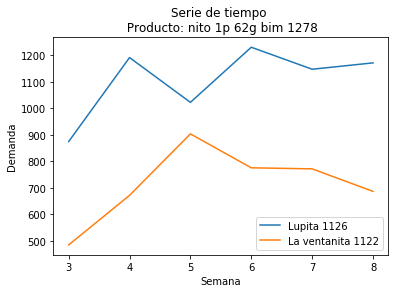

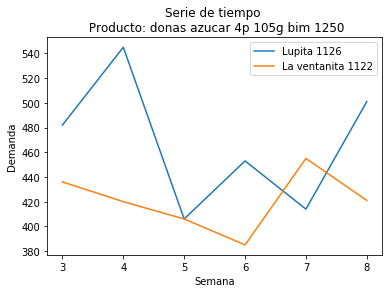

In [27]:
# lupita points
x1 = lupita_nito_1126.Semana.values
y1 = lupita_nito_1126.Demanda_uni_equil.values
plt.plot(x1, y1, label = "Lupita 1126")
# La ventanita points
x2 = ventanita_nito_1122.Semana.values
y2 = ventanita_nito_1122.Demanda_uni_equil.values
plt.plot(x2, y2, label = "La ventanita 1122")
# Set axis.
plt.xlabel('Semana')
plt.ylabel('Demanda')
# Set a title
plt.title('Serie de tiempo \n Producto: nito 1p 62g bim 1278')
# show a legend on the plot
plt.legend()
#
plt.show()

# lupita points
x1 = lupita_donas_1126.Semana.values
y1 = lupita_donas_1126.Demanda_uni_equil.values
plt.plot(x1, y1, label = "Lupita 1126")
# La ventanita points
x2 = ventanita_donas_1122.Semana.values
y2 = ventanita_donas_1122.Demanda_uni_equil.values
plt.plot(x2, y2, label = "La ventanita 1122")
# Set axis.
plt.xlabel('Semana')
plt.ylabel('Demanda')
# Set a title
plt.title('Serie de tiempo \n Producto: donas azucar 4p 105g bim 1250')
# show a legend on the plot
plt.legend()
#
plt.show()


### Muestra de clientes que representan una agencia

In [28]:
train.Agencia_ID.unique()

array([1110, 1111, 1112, 1113, 1114, 1116, 1117, 1118, 1119, 1120, 1121,
       1122, 1123, 1124, 1126, 1127, 1129, 1130, 1137, 1138, 1139, 1140,
       1142, 1143, 1146, 1147, 1150, 1152, 1153, 1155, 1156, 1159, 1160,
       1164, 1165, 1167, 1168, 1170, 1171, 1172, 1173])

In [29]:
dist_agencias = train.groupby('Agencia_ID').Agencia_ID.count().reset_index(name='count').sort_values(['count'], ascending=False)

In [30]:
input = list(train.groupby(['Agencia_ID','NombreCliente']).groups.keys())
d = defaultdict(list)
for v, k in input: d[v].append(k)
    
k_count = {}
for key in d.keys():
    k_count[key] = len(d[key])

In [31]:
data_dic = {'Agencia_ID': list(k_count.keys()), 'NumeroClientes': list(k_count.values())}
dist_agencias = pd.merge(dist_agencias, pd.DataFrame(data_dic), on = "Agencia_ID")

In [32]:
dist_agencias.sort_values(['NumeroClientes'])

,Agencia_ID,count,NumeroClientes
40,1160,26,2
38,1171,4274,33
37,1173,10162,79
35,1172,14483,85
24,1129,42591,93
33,1170,19456,96
28,1168,37135,112
25,1114,41305,119
23,1142,43259,120
34,1159,15705,149


Agencia 1123 como referente, ya que es la que tiene más participación tanto por su número de clientes como por presencia en el mercado

In [33]:
agencia_1123 = train[train["Agencia_ID"] == 1123]

In [34]:
seleccion_sample = agencia_1123.groupby('NombreCliente').NombreCliente.count().reset_index(name='count').sort_values(['count'], ascending=False)


In [35]:
seleccion_sample  =seleccion_sample[seleccion_sample["NombreCliente"] != "no identificado"]
seleccion_sample.shape

(3298, 2)

In [36]:
seleccion_sample["count"].describe()

count    3298.000000
mean      156.339903
std       285.003666
min         1.000000
25%        36.000000
50%        89.000000
75%       173.750000
max      6981.000000
Name: count, dtype: float64

In [37]:

seleccion_sample[seleccion_sample["count"]>2000].sum()

NombreCliente    lupitala ventanitamaryalexla pasaditala escond...
count                                                        40317
dtype: object

In [38]:
seleccion_sample.sum()

NombreCliente    lupitala ventanitamaryalexla pasaditala escond...
count                                                       515609
dtype: object

In [39]:
len(seleccion_sample[seleccion_sample["count"]>2000])

13

In [40]:
40317/515609

0.07819297180615543

13 clientes contien el 7% de las entregas por la agencia 1123, por lo que son una representación significativa

In [41]:
sample_cols = list(seleccion_sample[seleccion_sample["count"]>2000].NombreCliente)
agencia_1123_sample = agencia_1123[agencia_1123['NombreCliente'].isin(sample_cols)]
agencia_1123_sample.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreCliente,NombreProducto,Town,State
659180,3,1123,1,1001,201333,73,2,42.64,0,0.0,2,mary,pan multigrano linaza 540g bim 73,2094 chalco_bm,estado de mexico
659181,3,1123,1,1001,201333,1109,4,60.04,0,0.0,4,mary,pan blanco chico 360g bim 1109,2094 chalco_bm,estado de mexico
659182,3,1123,1,1001,201333,1125,6,57.60,0,0.0,6,mary,tortillinas 10p 255g tr 1125,2094 chalco_bm,estado de mexico
659183,3,1123,1,1001,201333,1129,7,123.20,0,0.0,7,mary,tortillinas 20p 510g tr 1129,2094 chalco_bm,estado de mexico
659184,3,1123,1,1001,201333,1146,5,106.95,0,0.0,5,mary,pan integral 675g bim 1146,2094 chalco_bm,estado de mexico


## Top 3 productos

In [42]:
agencia_1123_sample.groupby('NombreProducto').NombreProducto.count().reset_index(name='count').sort_values(['count'], ascending=False).head(3)

,NombreProducto,count
84,nito 1p 62g bim 1278,1710
77,mantecadas vainilla 4p 125g bim 1240,1541
116,rebanada 2p 55g bim 1284,1541


In [43]:
top_productos = list(agencia_1123_sample.groupby('NombreProducto').NombreProducto.count().reset_index(name='count').sort_values(['count'], ascending=False).head(3).NombreProducto
)

## Predicción

#### Producto: nito 1p 62g bim 1278

In [45]:
nito = agencia_1123_sample[agencia_1123_sample["NombreProducto"]== top_productos[0]]
test_nito = test[(test["NombreProducto"] == top_productos[0]) &  (test['NombreCliente'].isin(sample_cols)) & (test["Agencia_ID"] == 1123)]
test_nito = test_nito[["Semana", "Cliente_ID", "Producto_ID"]]

In [46]:
ids = test_nito['Cliente_ID']

#Separación del target
y = nito['Demanda_uni_equil']
X = nito[test_nito.columns.values]
print(X.shape, y.shape)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1729)
print(X_train.shape, X_test.shape)

# Xgboost clasificador logistico

rmsle  = make_scorer(rmsle_func, greater_is_better=False)
xlf = xgb.XGBRegressor(objective="reg:linear", seed=150237)
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])

# predicciones
preds = xlf.predict(X_test)

print('\nMean Square error" ', mean_squared_error(y_test,preds))

# submission
test_preds = np.around(xlf.predict(test_nito))



(1710, 3) (1710,)
(1368, 3) (342, 3)
[14:12:58] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13.76823
[1]	validation_0-rmse:12.37430
[2]	validation_0-rmse:11.56196
[3]	validation_0-rmse:11.02112
[4]	validation_0-rmse:10.69273
[5]	validation_0-rmse:10.61698
[6]	validation_0-rmse:10.48308
[7]	validation_0-rmse:10.22527
[8]	validation_0-rmse:10.08502
[9]	validation_0-rmse:10.02575
[10]	validation_0-rmse:10.04156
[11]	validation_0-rmse:9.98437
[12]	validation_0-rmse:9.81225
[13]	validation_0-rmse:9.80141
[14]	validation_0-rmse:9.71710
[15]	validation_0-rmse:9.71711
[16]	validation_0-rmse:9.59360
[17]	validation_0-rmse:9.48065
[18]	validation_0-rmse:9.43764
[19]	validation_0-rmse:9.44406
[20]	validation_0-rmse:9.43378
[21]	validation_0-rmse:9.31224
[22]	validation_0-rmse:9.28316
[23]	validation_0-rmse:9.19271
[24]	validation_0-rmse:9.17321
[25]	validation_0-rmse:9.16352
[26]	va

In [47]:
nito_submission = pd.DataFrame({"Cliente_ID":ids, "Demanda_uni_equil": test_preds.round()})
test_nito_sub = test[(test["NombreProducto"] == top_productos[0]) &  (test['NombreCliente'].isin(sample_cols)) & (test["Agencia_ID"] == 1123)]
#df con predicciones del producto
nito_pred = pd.merge(nito_submission,test_nito_sub, how = "right",on = "Cliente_ID")

#### Producto: mantecadas vainilla 4p 125g bim 1240

In [48]:
mantecada = agencia_1123_sample[agencia_1123_sample["NombreProducto"]== top_productos[1]]
test_mantecada = test[(test["NombreProducto"] == top_productos[1]) &  (test['NombreCliente'].isin(sample_cols)) & (test["Agencia_ID"] == 1123)]
test_mantecada = test_mantecada[["Semana", "Cliente_ID", "Producto_ID"]]


ids = test_mantecada['Cliente_ID']

#Separación del target
y = mantecada['Demanda_uni_equil']
X = mantecada[test_mantecada.columns.values]
print(X.shape, y.shape)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1729)
print(X_train.shape, X_test.shape)

# Xgboost clasificador logistico

rmsle  = make_scorer(rmsle_func, greater_is_better=False)
xlf = xgb.XGBRegressor(objective="reg:linear", seed=150237)
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])

# predicciones
preds = xlf.predict(X_test)

print('\nMean Square error" ', mean_squared_error(y_test,preds))

# submission
test_preds = np.around(xlf.predict(test_mantecada))


mantecada_submission = pd.DataFrame({"Cliente_ID":ids, "Demanda_uni_equil": test_preds.round()})
test_mantecada_sub = test[(test["NombreProducto"] == top_productos[1]) &  (test['NombreCliente'].isin(sample_cols)) & (test["Agencia_ID"] == 1123)]
#df con predicciones del producto
mantecada_pred = pd.merge(mantecada_submission,test_mantecada_sub, how = "right",on = "Cliente_ID")

(1541, 3) (1541,)
(1232, 3) (309, 3)
[14:13:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.47117
[1]	validation_0-rmse:3.96938
[2]	validation_0-rmse:3.65268
[3]	validation_0-rmse:3.44894
[4]	validation_0-rmse:3.34286
[5]	validation_0-rmse:3.22687
[6]	validation_0-rmse:3.17726
[7]	validation_0-rmse:3.14938
[8]	validation_0-rmse:3.14198
[9]	validation_0-rmse:3.12560
[10]	validation_0-rmse:3.11094
[11]	validation_0-rmse:3.10905
[12]	validation_0-rmse:3.09671
[13]	validation_0-rmse:3.08973
[14]	validation_0-rmse:3.09467
[15]	validation_0-rmse:3.10416
[16]	validation_0-rmse:3.09420
[17]	validation_0-rmse:3.06905
[18]	validation_0-rmse:3.07119
[19]	validation_0-rmse:3.06530
[20]	validation_0-rmse:3.04359
[21]	validation_0-rmse:3.04069
[22]	validation_0-rmse:3.04375
[23]	validation_0-rmse:3.02959
[24]	validation_0-rmse:3.02561
[25]	validation_0-rmse:3.01860
[26]	validation_0-

In [49]:
reb = agencia_1123_sample[agencia_1123_sample["NombreProducto"]== top_productos[2]]
test_reb = test[(test["NombreProducto"] == top_productos[2]) &  (test['NombreCliente'].isin(sample_cols)) & (test["Agencia_ID"] == 1123)]
test_reb = test_reb[["Semana", "Cliente_ID", "Producto_ID"]]

In [50]:
ids = test_reb['Cliente_ID']

#Separación del target
y = reb['Demanda_uni_equil']
X = reb[test_reb.columns.values]
print(X.shape, y.shape)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1729)
print(X_train.shape, X_test.shape)

# Xgboost clasificador logistico

rmsle  = make_scorer(rmsle_func, greater_is_better=False)
xlf = xgb.XGBRegressor(objective="reg:linear", seed=150237)
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])

# predicciones
preds = xlf.predict(X_test)

print('\nMean Square error" ', mean_squared_error(y_test,preds))

# submission
test_preds = np.around(xlf.predict(test_reb))

(1541, 3) (1541,)
(1232, 3) (309, 3)
[14:14:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10.31929
[1]	validation_0-rmse:8.90476
[2]	validation_0-rmse:8.03838
[3]	validation_0-rmse:7.62542
[4]	validation_0-rmse:7.37077
[5]	validation_0-rmse:7.17559
[6]	validation_0-rmse:7.10898
[7]	validation_0-rmse:7.04929
[8]	validation_0-rmse:6.93931
[9]	validation_0-rmse:6.91334
[10]	validation_0-rmse:6.91074
[11]	validation_0-rmse:6.91126
[12]	validation_0-rmse:6.93915
[13]	validation_0-rmse:6.93044
[14]	validation_0-rmse:6.96110
[15]	validation_0-rmse:6.92474
[16]	validation_0-rmse:6.95338
[17]	validation_0-rmse:6.90729
[18]	validation_0-rmse:6.89437
[19]	validation_0-rmse:6.89622
[20]	validation_0-rmse:6.88281
[21]	validation_0-rmse:6.87116
[22]	validation_0-rmse:6.84126
[23]	validation_0-rmse:6.84874
[24]	validation_0-rmse:6.88010
[25]	validation_0-rmse:6.87448
[26]	validation_0

In [51]:
reb_submission = pd.DataFrame({"Cliente_ID":ids, "Demanda_uni_equil": test_preds.round()})
test_reb_sub = test[(test["NombreProducto"] == top_productos[2]) &  (test['NombreCliente'].isin(sample_cols)) & (test["Agencia_ID"] == 1123)]
#df con predicciones del producto
reb_pred = pd.merge(reb_submission,test_reb_sub, how = "right",on = "Cliente_ID")

Unión de predicciones

In [52]:
predicciones_s9 = pd.concat([nito_pred, mantecada_pred, reb_pred])

##### Series de tiempo con predicción de semana 9

In [53]:
union_s9 = pd.concat([agencia_1123_sample[predicciones_s9.columns.values], predicciones_s9])

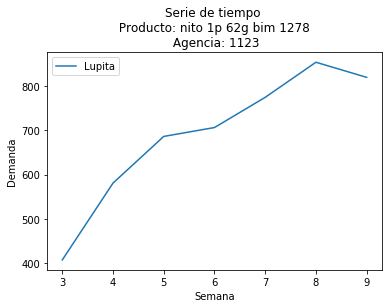

In [54]:
#Cliente lupita Serie de tiempo
lupita_nito = union_s9[(union_s9['NombreCliente'] == "lupita")  & (union_s9['NombreProducto'] == "nito 1p 62g bim 1278") ]
#lupita_nito =lupita_nito.drop(['Ruta_SAK', 'Cliente_ID'], axis = 'columns')
lupita_nito=lupita_nito.groupby(['Semana', 'NombreProducto', 'NombreCliente','Agencia_ID', 'Canal_ID','Producto_ID', 'Town','State']).agg({
                                                       'Demanda_uni_equil':'sum'
                                                      })

lupita_nito.reset_index(inplace=True) 

# lupita points
x1 = lupita_nito.Semana.values
y1 = lupita_nito.Demanda_uni_equil.values
plt.plot(x1, y1, label = "Lupita")

# Set axis.
plt.xlabel('Semana')
plt.ylabel('Demanda')
# Set a title
plt.title('Serie de tiempo \n Producto: nito 1p 62g bim 1278 \n Agencia: 1123')
# show a legend on the plot
plt.legend()
#
plt.show()

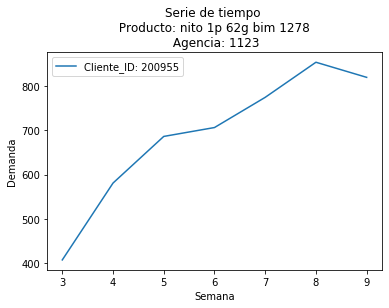

In [56]:
lupita_nito.reset_index(inplace=True) 

# lupita points
x1 = lupita_nito.Semana.values
y1 = lupita_nito.Demanda_uni_equil.values
plt.plot(x1, y1, label = "Cliente_ID: 200955")

# Set axis.
plt.xlabel('Semana')
plt.ylabel('Demanda')
# Set a title
plt.title('Serie de tiempo \n Producto: nito 1p 62g bim 1278 \n Agencia: 1123')
# show a legend on the plot
plt.legend()
#
plt.show()